## Sentiment Analysis of Twitter Data Using Machine Learning

**Name:** Lakshmi Sowjanya Gangumolu

**Date:** 11/19/2024

### Introduction

In the ever-changing world of social media, Twitter has emerged as a vibrant platform where users share opinions, experiences, and engage in diverse discussions. Analyzing the sentiments expressed in these tweets offers valuable insights for applications such as market research, public opinion analysis, and trend forecasting. Sentiment analysis of this data enables businesses, researchers, and policymakers to gauge public mood and reactions in real-time.

This project leverages the Sentiment140 dataset, a rich compilation of 1.6 million tweets, to develop and evaluate machine learning models for sentiment classification. Each tweet in the dataset is labeled with a sentiment score, making it an ideal resource for training and validating sentiment analysis models. By examining these sentiments, I aim to uncover deeper insights into public opinions and emerging trends.

### **Introduction to Libraries**

This project uses several Python libraries for data processing, visualization, and model building:

- **Pandas:** For handling and analyzing structured data, such as reading and processing CSV files.

- **Matplotlib and Seaborn:** For creating visualizations. 

- **NLTK:** A text processing library used for tokenization, lemmatization, stemming, and sentiment analysis (using VADER).

- **re:** The regular expressions library for text cleaning and pattern matching.

- **NumPy:** For efficient numerical computations and array handling.

- **TensorFlow:** For building and training neural networks, used here for a Bidirectional LSTM model.

- **scikit-learn:** For tasks like splitting data, model evaluation, and generating metrics.

- **Transformers by Hugging Face:** For BERT model

- **datasets.Dataset:** Used to handle datasets efficiently

- **Collections:** Provides the Counter class for analyzing word frequencies.

In [1]:
# library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.system('pip install nltk')
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout, Bidirectional, Input, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import scipy.sparse as sp
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from datasets import Dataset
import warnings
warnings.filterwarnings("ignore")

**Reading Data**

In [2]:
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv("twitter_data.csv",encoding='ISO-8859-1', names = columns)

### Exploratory Data Analysis (EDA)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None


In [4]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
display(df)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


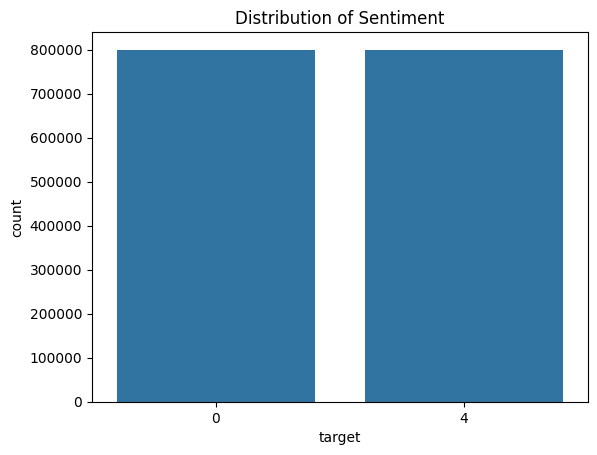

In [6]:
sns.countplot(x='target', data=df)
plt.title('Distribution of Sentiment')
plt.show()



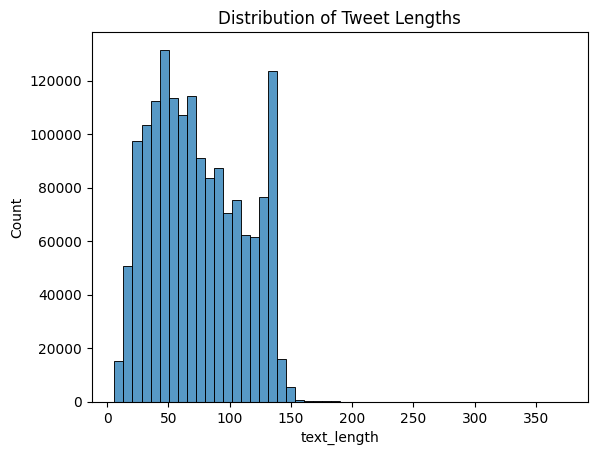

In [7]:
df['text_length'] = df['text'].apply(len)
sns.histplot(df['text_length'], bins=50)
plt.title('Distribution of Tweet Lengths')
plt.show()


In [8]:
for sentiment in df['target'].unique():
    print(f"Examples of tweets with sentiment {sentiment}:")
    print(df[df['target'] == sentiment]['text'].head())
    print()

Examples of tweets with sentiment 0:
0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

Examples of tweets with sentiment 4:
800000         I LOVE @Health4UandPets u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002    @DaRealSunisaKim Thanks for the Twitter add, S...
800003    Being sick can be really cheap when it hurts t...
800004      @LovesBrooklyn2 he has that effect on everyone 
Name: text, dtype: object



### Data Preprocessing

Removing missing values if any

In [9]:
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())

target         0
ids            0
date           0
flag           0
user           0
text           0
text_length    0
dtype: int64
target         0
ids            0
date           0
flag           0
user           0
text           0
text_length    0
dtype: int64


**Text preprocessing: Tokenization, removing stop words, stemming/lemmatization.**

In [10]:
 nltk.download('punkt')
 nltk.download('stopwords')
 nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                  # Lowercase text
    tokens = word_tokenize(text)         # Tokenize text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stop words and lemmatize
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)
print(df[['text', 'cleaned_text']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  
0  awww thats bummer shoulda got david carr third...  
1  upset cant update facebook texting might cry r...  
2    dived many time ball managed save rest go bound  
3                    whole body feel itchy like fire  
4                           behaving im mad cant see  


**Split the dataset into training, validation, and test sets.**

In [11]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)
print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")

Training set size: 960000
Validation set size: 320000
Test set size: 320000


**Vectorize text using TF-IDF**

**TF-IDF Vectorization:** Convert the cleaned tweet text into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. This process helps quantify the importance of each word in the tweets, allowing us to use them as input features for our machine learning model.

**Target Transformation:** Transform the target sentiment labels into a binary format where 0 represents negative sentiment and 1 represents non-negative sentiment (neutral or positive). This binary classification setup simplifies our model's task to distinguish between negative and non-negative sentiments.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_data['cleaned_text'])
X_val_tfidf = vectorizer.transform(val_data['cleaned_text'])
X_test_tfidf = vectorizer.transform(test_data['cleaned_text'])

y_train = train_data['target'].apply(lambda x: 0 if x == 0 else 1)
y_val = val_data['target'].apply(lambda x: 0 if x == 0 else 1)
y_test = test_data['target'].apply(lambda x: 0 if x == 0 else 1)

## Training process

### Pipeline

1. Data Loading: Data was loaded from Sentiment140, preprocessed, and split into training, validation, and test sets.
2. Preprocessing:
    - Text cleaning (removing URLs, mentions, etc.).
    - TF-IDF vectorization with unigrams and bigrams.
    - Additional features: VADER sentiment scores, tweet length, and capital letter count.
3. Hyperparameters:
    - Logistic Regression: max_iter=1000
    - Random Forest: n_estimators=100
    - LSTM:
        - Learning rate: 0.0001
        - Batch size: 128
        - Epochs: 10
    - BERT:
         - The BERT-base-uncased model was fine-tuned using the Hugging Face library for sentiment analysis tasks.
        - Text was tokenized using BERT’s tokenizer, and sequences were padded/truncated to a fixed length.
        - The model was trained and evaluated using the Trainer API, with separate steps for training, validation, and testing.

## Model Design and Implementation

### Logistic Regression model

The Logistic Regression model is implemented by first initializing the model with max_iter=1000 to ensure convergence. It is trained on the TF-IDF features of the training data (X_train_tfidf) and the corresponding labels (y_train). After training, the model makes predictions on the training, validation, and test datasets. The model's performance is evaluated by calculating accuracy for each dataset and generating a confusion matrix and classification report on the test set to assess its precision, recall, and F1-score.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Evaluate Logistic Regression model
y_train_pred = model.predict(X_train_tfidf)
y_val_pred = model.predict(X_val_tfidf)
y_test_pred = model.predict(X_test_tfidf)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.7761
Validation Accuracy: 0.7741
Test Accuracy: 0.7723
Confusion Matrix:
[[119691  39803]
 [ 33054 127452]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           1       0.76      0.79      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



#### RESULTS:

Logistic Regression achieved a test accuracy of 77.23%, with a relatively balanced performance across both sentiment classes. It showed strong precision (0.78) and recall (0.75) for the negative class, while maintaining good recall (0.79) for the positive class.

- **Training Accuracy (77.61%):** The model correctly predicted the sentiment of about 77.55% of the tweets in the training dataset.

- **Validation Accuracy (77.41%):** This represents how well the model generalizes to new, unseen data. It's close to the training accuracy, indicating that the model isn't overfitting.

- **Test Accuracy (77.23%):** Similar to validation, this shows how well the model performs on completely new data. It's consistent with both training and validation, which is a good sign.

Looking at the confusion matrix and classification report, we see that the model is balanced in predicting both negative and non-negative sentiments. However, it sometimes misclassifies negative tweets as non-negative and vice versa.

### Feature Engineering and Random Forest Model

Enhanced the feature set by adding VADER sentiment scores, tweet length, and the number of capital letters, alongside TF-IDF vectorization with unigrams and bigrams for richer text representation. These features were combined to train a Random Forest classifier, using multi-core processing to speed up training.

In [14]:
# Sample the data for quicker iterations
df_sample = df.sample(n=100000, random_state=42)

# Initialize VADER for sentiment scores
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Function to compute sentiment scores
def compute_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

df_sample['sentiment_score'] = df_sample['cleaned_text'].apply(compute_sentiment_scores)
df_sample['text_length'] = df_sample['cleaned_text'].apply(len)
df_sample['num_capital_letters'] = df_sample['cleaned_text'].apply(lambda text: sum(1 for c in text if c.isupper()))

# Vectorize text using TF-IDF with n-grams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)  # Reduced max_features and n-gram range for optimization
X_tfidf = tfidf_vectorizer.fit_transform(df_sample['cleaned_text'])

# Combine TF-IDF, sentiment scores, and additional features
additional_features = np.array(df_sample[['sentiment_score', 'text_length', 'num_capital_letters']])
additional_features_sparse = sp.csr_matrix(additional_features)

X_combined = sp.hstack([X_tfidf, additional_features_sparse])
y = df_sample['target'].apply(lambda x: 0 if x == 0 else 1)

X_train_combined, X_test_combined, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
X_train_combined, X_val_combined, y_train, y_val = train_test_split(X_train_combined, y_train, test_size=0.25, random_state=42)

# Train Random Forest model with parallel processing
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)  # Enable parallel processing
rf_model.fit(X_train_combined, y_train)

# Evaluate Random Forest model
y_val_pred = rf_model.predict(X_val_combined)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

y_test_pred = rf_model.predict(X_test_combined)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))
print('Classification Report:')
print(classification_report(y_test, y_test_pred))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Validation Accuracy: 0.7473
Test Accuracy: 0.7507
Confusion Matrix:
[[7492 2503]
 [2484 7521]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      9995
           1       0.75      0.75      0.75     10005

    accuracy                           0.75     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.75      0.75      0.75     20000



#### RESULTS

Random Forest achieved a test accuracy of 75.07%, slightly lower than Logistic Regression. However, the integration of additional features (sentiment scores, tweet length, capital letters) demonstrated the importance of engineered features in enhancing classification. Precision and recall for both classes were evenly matched at 0.75.

The model misclassified 2,503 false positives and 2,484 false negatives, showing a better balance compared to Logistic Regression.


### Long Short-Term Memory (LSTM)

The data preprocessing for the LSTM model was done again by cleaning the text, which includes removing URLs, mentions, hashtags, numbers, and punctuation. The text is then tokenized, converted to lowercase, and lemmatized to standardize the words. Additional features such as tweet length, the number of capital letters, and exclamation marks are extracted. Sentiment scores are also computed using VADER. Next, the text is converted into word embeddings using pre-trained GloVe vectors. The model uses a bidirectional LSTM to capture the context of the text in both directions, and the LSTM output is combined with the additional features. The model is trained using TensorFlow with multi-GPU support for faster processing, and its performance is evaluated using accuracy, confusion matrix, and classification report.

In [16]:

df = pd.read_csv("twitter_data.csv", encoding='ISO-8859-1', names=columns)

# Remove neutral sentiment (label 2)
df = df[df['target'] != 2]

# Map sentiments to binary classification
df['target'] = df['target'].map({0: 0, 4: 1})

# Preprocess text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                  # Lowercase text
    tokens = word_tokenize(text)         # Tokenize text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stop words and lemmatize
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)

# Use VADER to get sentiment scores
sid = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    sentiment = sid.polarity_scores(text)
    return sentiment['compound']

df['vader_score'] = df['text'].apply(get_vader_sentiment)

# Additional features
df['text_length'] = df['text'].apply(len)
df['num_capital_letters'] = df['text'].apply(lambda text: sum(1 for c in text if c.isupper()))
df['num_exclamation_marks'] = df['text'].apply(lambda text: text.count('!'))

# Use a subset of the data for faster training
df_subset = df.sample(n=1000000, random_state=42)
y_subset = df_subset['target']
X_subset = df_subset['cleaned_text']
vader_scores = df_subset['vader_score'].values
text_lengths = df_subset['text_length'].values
num_capitals = df_subset['num_capital_letters'].values
num_exclamations = df_subset['num_exclamation_marks'].values

# Tokenization and Padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_subset)
X_seq = tokenizer.texts_to_sequences(X_subset)
X_pad = pad_sequences(X_seq, maxlen=200)

# Load GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

embeddings_index = load_glove_embeddings("glove.6B.100d.txt")

# Create an embedding matrix
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Split the dataset into training, validation, and test sets
X_train_pad, X_test_pad, y_train, y_test, vader_train, vader_test, length_train, length_test, capitals_train, capitals_test, exclamations_train, exclamations_test = train_test_split(
    X_pad, y_subset, vader_scores, text_lengths, num_capitals, num_exclamations, test_size=0.2, random_state=42)
X_train_pad, X_val_pad, y_train, y_val, vader_train, vader_val, length_train, length_val, capitals_train, capitals_val, exclamations_train, exclamations_val = train_test_split(
    X_train_pad, y_train, vader_train, length_train, capitals_train, exclamations_train, test_size=0.25, random_state=42)

# Create tf.data datasets with additional features
def create_tf_dataset(X, vader, length, capitals, exclamations, y, batch_size=128):
    dataset = tf.data.Dataset.from_tensor_slices(((X, vader, length, capitals, exclamations), y))  # Include additional features
    dataset = dataset.shuffle(buffer_size=1024)                   # Shuffle the dataset
    dataset = dataset.batch(batch_size)                           # Batch the dataset
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)  # Prefetch for performance
    return dataset

train_dataset = create_tf_dataset(X_train_pad, vader_train, length_train, capitals_train, exclamations_train, y_train)
val_dataset = create_tf_dataset(X_val_pad, vader_val, length_val, capitals_val, exclamations_val, y_val)
test_dataset = create_tf_dataset(X_test_pad, vader_test, length_test, capitals_test, exclamations_test, y_test)

# Calculate class weights to handle class imbalance
class_weights = {0: 1.0, 1: 1.0}  # Adjust based on the class distribution

# Define LSTM Model with GloVe embeddings and additional features
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    input_text = Input(shape=(200,), name='text_input')
    input_vader = Input(shape=(1,), name='vader_input')
    input_length = Input(shape=(1,), name='length_input')
    input_capitals = Input(shape=(1,), name='capitals_input')
    input_exclamations = Input(shape=(1,), name='exclamations_input')

    embedding_layer = Embedding(input_dim=vocab_size,
                                output_dim=embedding_dim,
                                weights=[embedding_matrix],
                                input_length=200,
                                trainable=False)(input_text)
    x = SpatialDropout1D(0.3)(embedding_layer)
    x = Bidirectional(LSTM(units=128, return_sequences=True, dropout=0.3))(x)
    x = Bidirectional(LSTM(units=64, dropout=0.3))(x)
    x = Flatten()(x)

    combined = Concatenate()([x, input_vader, input_length, input_capitals, input_exclamations])
    combined = Dropout(0.3)(combined)
    output = Dense(1, activation='sigmoid')(combined)

    lstm_model = tf.keras.Model(inputs=[input_text, input_vader, input_length, input_capitals, input_exclamations], outputs=output)

    # Compile and Train Model
    lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

lstm_model.fit(train_dataset, epochs=10, validation_data=val_dataset, class_weight=class_weights)

# Evaluate Model
loss, accuracy = lstm_model.evaluate(test_dataset)
print(f'Test Accuracy: {accuracy:.4f}')

# Generate predictions and evaluate
y_test_pred = (lstm_model.predict(test_dataset) > 0.5).astype("int32")
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)

Epoch 1/10
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 3052s 650ms/step - accuracy: 0.5655 - loss: 2.2439 - val_accuracy: 0.7142 - val_loss: 0.5640
Epoch 2/10
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 3027s 646ms/step - accuracy: 0.6845 - loss: 0.5877 - val_accuracy: 0.7393 - val_loss: 0.5249
Epoch 3/10
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 3046s 650ms/step - accuracy: 0.7121 - loss: 0.5559 - val_accuracy: 0.7471 - val_loss: 0.5089
Epoch 4/10
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 3021s 644ms/step - accuracy: 0.7231 - loss: 0.5421 - val_accuracy: 0.7538 - val_loss: 0.5012
Epoch 5/10
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 3042s 649ms/step - accuracy: 0.7269 - loss: 0.5361 - val_accuracy: 0.7559 - val_loss: 0.4969
Epoch 6/10
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 3038s 648ms/step - accuracy: 0.7310 - loss: 0.5317 - val_accuracy: 0.7584 - val_loss: 0.4931
Epoch 7/10
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 3036s 648ms/step - accuracy: 0.7339 - loss: 0

#### RESULTS

The Bidirectional LSTM achieved a test accuracy of 76.72%, slightly outperforming Random Forest but slightly lower than Logistic Regression. This model incorporates contextual embeddings and additional features (sentiment scores, tweet length, etc.), but its binary classification precision (0.50 for both classes) and recall (0.48–0.53) suggest room for improvement.

**Training and Validation Performance:**

- Training Accuracy steadily improved from 56.55% (Epoch 1) to 74.07% (Epoch 10).
- Validation Accuracy increased consistently, starting at 71.42% (Epoch 1) and reaching 76.61% (Epoch 10), indicating effective learning with no major overfitting.

The LSTM model demonstrated a good learning curve with improvements in accuracy and loss over multiple epochs. The model's ability to generalize to unseen data was satisfactory, as reflected by the test accuracy. However, the balanced performance in precision, recall, and F1-score indicates that there is room for improvement, especially in reducing false positives and false negatives.


### Using BERT

Implemented using pre-trained BERT model. For clarity, the dataset is loaded and cleaned again by removing neutral sentiments and mapping the labels to binary values (0 for negative and 1 for positive). The text is further cleaned by removing URLs, mentions, hashtags, and punctuation. The dataset is then split into training, validation, and test sets. BERT’s tokenizer processes the text data, and the dataset is converted to the Hugging Face Dataset format for compatibility with BERT. The model is fine-tuned on the training data using the Trainer API, with accuracy computed for each dataset. After training, the model’s performance is evaluated on the test set, and classification metrics, including confusion matrix and accuracy, are printed to assess the results.

In [15]:
df = pd.read_csv("twitter_data.csv", encoding='ISO-8859-1', names=columns)

# Remove neutral sentiment (label 2)
df = df[df['target'] != 2]

# Map sentiments to binary classification
df['target'] = df['target'].map({0: 0, 4: 1})

# Preprocess text
df['cleaned_text'] = df['text'].apply(lambda x: re.sub(r'http\S+|@\w+|#\w+|\d+|[^\w\s]', '', x.lower()))

# Use a subset of the data for faster training
df_subset = df.sample(n=100000, random_state=42)
y_subset = df_subset['target']
X_subset = df_subset['cleaned_text']

# Split the dataset
train_texts, test_texts, train_labels, test_labels = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.25, random_state=42)

# Convert to Hugging Face datasets
train_dataset = Dataset.from_dict({'text': train_texts.tolist(), 'label': train_labels.tolist()})
val_dataset = Dataset.from_dict({'text': val_texts.tolist(), 'label': val_labels.tolist()})
test_dataset = Dataset.from_dict({'text': test_texts.tolist(), 'label': test_labels.tolist()})

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenize the datasets
def tokenize_function(examples):
    return tokenizer(examples['text'], truncation=True, padding='max_length', max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for PyTorch
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# Data collator
data_collator = DataCollatorWithPadding(tokenizer)

# Define accuracy metric function
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    acc = accuracy_score(p.label_ids, preds)
    return {'accuracy': acc}

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    logging_dir='./logs',
    report_to='none',
    dataloader_num_workers=4,
    gradient_accumulation_steps=2,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate the model on the training set
train_predictions = trainer.predict(train_dataset)
train_preds = np.argmax(train_predictions.predictions, axis=-1)
train_accuracy = accuracy_score(train_labels, train_preds)

# Evaluate the model on the validation set
val_metrics = trainer.evaluate(eval_dataset=val_dataset)
val_accuracy = val_metrics['eval_accuracy']

# Predict on the test set
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=-1)
test_accuracy = accuracy_score(test_labels, preds)

# Print training, validation, and test accuracy
print(f'\nTraining Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Confusion matrix and classification report
print('\nConfusion Matrix:')
print(confusion_matrix(test_labels, preds))
print('\nClassification Report:')
print(classification_report(test_labels, preds))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/60000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy
1,0.404700,0.427224,0.806950
2,0.277100,0.430608,0.830300
3,0.132300,0.595567,0.826850



Training Accuracy: 0.9828
Validation Accuracy: 0.8268
Test Accuracy: 0.8247

Confusion Matrix:
[[8246 1749]
 [1757 8248]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      9995
           1       0.83      0.82      0.82     10005

    accuracy                           0.82     20000
   macro avg       0.82      0.82      0.82     20000
weighted avg       0.82      0.82      0.82     20000



#### RESULTS

The BERT model achieved a test accuracy of 82.47%, with training and validation accuracies of 98.28% and 82.68%, respectively, indicating strong generalization and minimal overfitting. Over three epochs, the training loss decreased significantly (0.4047 to 0.1323), while validation loss slightly increased after the second epoch (0.4306 to 0.5956). The model demonstrated balanced performance, with precision, recall, and F1-scores of 0.82 for both classes, as seen in the classification report. The confusion matrix highlights balanced predictions with some misclassifications. Overall, BERT effectively captured contextual nuances but shows potential for improvement through regularization and hyperparameter tuning.

## Conclusion

#### Best Performing Model:
BERT achieved the highest accuracy (82.47%) and balanced metrics across precision, recall, and F1-score. Its ability to capture bidirectional context makes it the most suitable model for sentiment analysis tasks.

#### Baseline Performance:
Logistic Regression provided a solid baseline with an accuracy of 77.23%. Its simplicity and efficiency make it ideal for quick experimentation or systems with limited computational resources.

#### Role of Feature Engineering:
Random Forest demonstrated the importance of feature engineering, such as including sentiment scores and tweet metadata, and its performance was comparable to Logistic Regression with 75.07% accuracy. However, the performance improvement over Logistic Regression was marginal, indicating that the additional features did not provide a significant boost for this task.

#### Sequential Modeling Insights:
Sequential Modeling Insights:
Bidirectional LSTM showed the potential of deep learning in sentiment analysis, improving progressively over epochs. However, it still faced challenges, particularly with class imbalances, and its accuracy plateaued at 76.72%.

#### Future Directions:

- BERT: Further fine-tuning BERT with larger datasets or domain-specific pre-trained models could improve results.
- Ensemble Models: Combining the strengths of Logistic Regression, Random Forest, and BERT may provide a more robust solution.

In conclusion, **BERT** is the recommended model for high-performance sentiment analysis tasks, particularly when computational resources are available. However, for simpler tasks or when quick results are needed, **Logistic Regression** remains a solid and efficient choice.